In [5]:
import rasterio as rio
import numpy as np
import pandas as pd
from rasterio import features
from rasterio.plot import show
import geopandas as gpd
import matplotlib.pyplot as plt

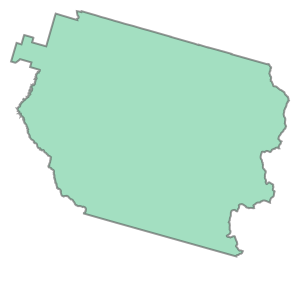

In [2]:
counties = gpd.read_file("../data/or_us_county.geojson")
geom = counties.iloc[0].geometry
geom

In [3]:
%time
with rio.open("../data/or_forest_own.tif") as src:
    window = src.window(*geom.bounds)
    fown = src.read(window=window, masked=True)
    waffine = rio.windows.transform(window, src.transform)
    mask = features.rasterize(
        [(geom, 1)],
        out_shape=fown.shape[1:],
        transform=waffine,
        fill=0,
        all_touched=True,
        dtype="uint8",
    )

fown.mask = mask == 0
fown.shape

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


(2, 2701, 3059)

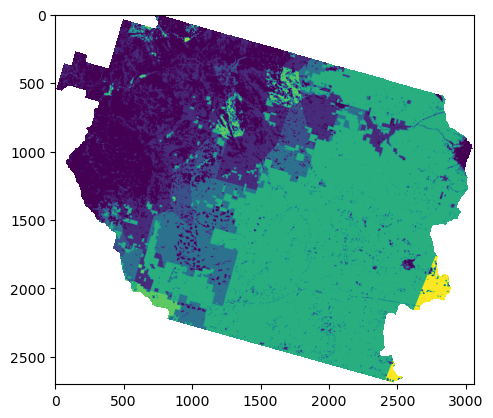

<Axes: >

In [4]:
show(fown[0,])

In [28]:
data = fown[0].data * mask

<Axes: >

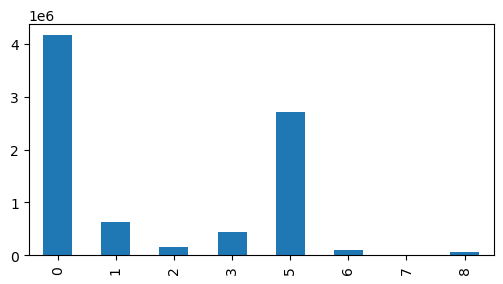

In [31]:
pd.Series(data.flatten()).astype(int).sort_values()\
    .value_counts(sort=False).plot.bar(figsize=(6, 3))